# 넷플릭스의 콘텐츠 보유 현황과 수급 전략 분석

- 분석 목표 : 넷플릭스에서 보유한 콘텐츠 현황과 최근 집중하는 콘텐츠 유형을 파악해 넷플릭스의 시장 점유를 위한 콘텐츠 수급 전략을 분석한다.
- 데이터 출처 : [Netflix Movies and TV Shows | Kaggle](https://www.kaggle.com/shivamb/netflix-shows)
- 참고 사이트 : [영화, TV 관람 등급 표](https://www.primevideo.com/help/ref=atv_hp_nd_cnt?language=ko_KR&nodeId=GFGQU3WYEG6FSJFJ)

```
Step 1. 가설 설정
Step 2. 기본 전처리
     2-1. 불필요한 컬럼 제거
     2-2. 불필요한 행 제거
     2-3. 데이터 타입 변환
     2-4. 시계열 데이터 변환
     2-5. 데이터 구간(시간) 분할
Step 3. 가설 검정
     3-1. 특정 콘텐츠 유형에 대한 집중 수급 여부 분석
     3-2. 특정 국가를 겨냥한 콘텐츠 현황 분석
     3-3. 콘텐츠 수급 대상 연도 분석
     3-4. 넷플릭스의 주요 소비자 타겟(연령대) 분석
     3-5. 콘텐츠 평균 재생 시간 분석
     3-5. 넷플릭스에서 주로 수급하는 콘텐츠 장르 분석
Step 4. 종합 결론
```

---
## 1. 가설 설정

각 컬럼별 유효 데이터와 결측치 분포를 확인하고, 이에 따라 분석 목표에 도달하기 위한 가설을 설정합니다.

In [6]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [7]:
netflix_r = pd.read_csv('./data/netflix_titles.csv')
netflix_r

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [8]:
netflix_r.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

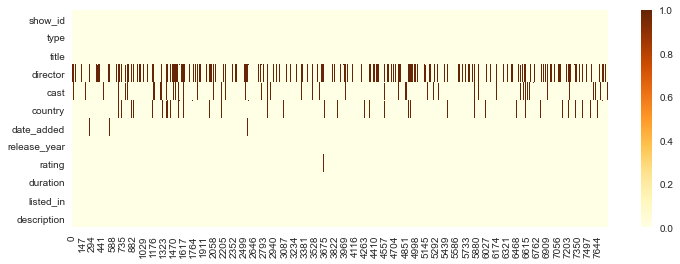

In [150]:
plt.style.use('seaborn')

plt.figure(figsize=(12,4))
sns.heatmap(netflix_r.isnull().T, cmap='YlOrBr')
plt.show()

- `show_id` : 해당 데이터셋 이외에 병합할 테이블이 없기 때문에 id 컬럼은 제거할 것입니다.
- `director`: 감독에 대한 정보는 고려하지 않겠습니다.
- `cast`: 배우 역시 고려하지 않겠습니다.


본 데이터에서 검증하고자 하는 가설은 아래와 같습니다.(H1 = 연구가설)

1. H1 : 최근 특정 콘텐츠 유형(TV show or Movie)이 늘고 있다. (주요 컬럼 : type)
2. H1 : 최근 특정 국가의 콘텐츠 비중이 늘고 있다. (주요 컬럼 : country)
3. H1 : 최근 옛날(오래된) 콘텐츠 수급 비중이 늘고 있다. (주요 컬럼 : release_year)
4. H1 : 최근 타겟층(관람등급)이 명확한 콘텐츠 비중이 늘고 있다. (주요 컬럼 : rating)
5. H1 : 최근 길이(시리즈, 시간)가 짧은 콘텐츠 비중이 늘고 있다. (주요 컬럼 : duration)
6. H1 : 최근 유통하는 콘텐츠 장르가 더 다양해지고 있다. (주요 컬럼 : listed_in, description)


위 순서로 가설을 검증해나가며 넷플릭스의 시장 점유 전략에 대한 최종 결론을 도출하고자 합니다.
<br><br>


---
## 2. 기본 전처리

본격적인 분석에 앞서 미리 처리해야할 사항은 아래와 같습니다.

1. 분석에 사용할 컬럼만 가져온다.
2. 사용하지 않을 행은 제거한다.(시간 누락)
3. 추세 확인을 위해 시계열 데이터로 변환한다.
4. 과거와 현재를 상대적으로 비교하기 위해 구간(시간)을 분할한다.

In [10]:
netflix_r.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


<br>

### 2-1. 불필요한 컬럼 제거

사용하지 않을 아래 컬럼들을 제거합니다.
- `show_id`
- `director`
- `cast`

In [11]:
nflx = netflix_r.copy()
nflx.drop(['show_id','director','cast'], axis=1, inplace=True)
nflx.head(3)

,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


<br>

### 2-2. 불필요한 행 제거

In [12]:
nflx.isnull().sum()

type              0
title             0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

모든 가설은 넷플릭스에 콘텐츠가 올라간 시간에 기준을 두고 있고, 최근 전략을 파악하고자 하는 것이 분석 목표이므로 시간 정보(date_added)가 없는 행은 과감하게 삭제하도록 합니다.

In [13]:
nflx['date_added'].isnull().sum()

10

In [14]:
nflx = nflx.loc[nflx['date_added'].isnull()==False]
nflx['date_added'].isnull().sum()

0

<br>

### 2-3. 데이터 타입 변환

In [15]:
nflx.dtypes

type            object
title           object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

날짜 데이터는 datetime 타입으로, 콘텐츠 길이(n부작, 시간)는 숫자로 변환합니다.
- `date_added`, `release_year` -> datetime
- `duration` -> int

In [16]:
nflx['date_added'] = nflx['date_added'].astype('datetime64')
nflx['date_added']


0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7777, dtype: datetime64[ns]

In [17]:
# 최초 출시일에 월/일 정보가 누락되어 있으므로 1월 1일로 일괄 대체한다.(넷플릭스에서 유통된 연도가 같은 경우 시간상 역행이 발생하지 않도록 하기 위함)
nflx['release_year'] = pd.to_datetime(nflx['release_year'], format='%Y')
nflx['release_year']

0      2020-01-01
1      2016-01-01
2      2011-01-01
3      2009-01-01
4      2008-01-01
          ...    
7782   2005-01-01
7783   2015-01-01
7784   2019-01-01
7785   2019-01-01
7786   2019-01-01
Name: release_year, Length: 7777, dtype: datetime64[ns]

콘텐츠 길이는 콘텐츠 타입에 따라 형식이 다릅니다.
- `type`이 TV Show라면 단일 시리즈인 경우 1 Season, 연속 시리즈인 경우 N Seasons로 표기된다.
- `type`이 TV Show지만 `duration` 단위가 Season 혹은 Seasons가 아닌 예외 케이스는 없다.

In [18]:
nflx.loc[nflx['type']=='TV Show','duration']

0       4 Seasons
5        1 Season
11       1 Season
12       1 Season
16       1 Season
          ...    
7767     1 Season
7775     1 Season
7777    2 Seasons
7779     1 Season
7785     1 Season
Name: duration, Length: 2400, dtype: object

In [19]:
# 1 Season 혹은 N Seasons로 표기되지 않은 예외케이스 갯수 확인
(nflx.loc[nflx['type']=='TV Show','duration'].str.contains('Season')==False).sum()

0

In [20]:
# 단위(Seasons, Season) 제거
nflx.loc[nflx['type']=='TV Show','duration'] = nflx.loc[nflx['type']=='TV Show','duration'].apply(lambda x : x.split(" ")[0])
nflx.loc[nflx['type']=='TV Show','duration']

0       4
5       1
11      1
12      1
16      1
       ..
7767    1
7775    1
7777    2
7779    1
7785    1
Name: duration, Length: 2400, dtype: object

- `type`이 Movie라면 모두 min으로 표기한다.
- `type`이 Movie이지만 `duration` 단위가 min이 아닌 예외 케이스는 없다.

In [21]:
nflx.loc[nflx['type']=='Movie','duration']

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7781     88 min
7782     99 min
7783    111 min
7784     44 min
7786     90 min
Name: duration, Length: 5377, dtype: object

In [22]:
# min으로 표기되지 않은 예외케이스 갯수 확인
(nflx.loc[nflx['type']=='Movie','duration'].str.contains('min')==False).sum()

0

In [23]:
# 단위(min) 제거
nflx.loc[nflx['type']=='Movie','duration'] = nflx.loc[nflx['type']=='Movie','duration'].apply(lambda x : x.split(" ")[0])
nflx.loc[nflx['type']=='Movie','duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: object

In [24]:
nflx['duration'] = nflx['duration'].astype('int64')

In [25]:
# 데이터 확인
nflx.head(3)

,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,Brazil,2020-08-14,2020-01-01,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Mexico,2016-12-23,2016-01-01,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Singapore,2018-12-20,2011-01-01,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


### 2-3. 시계열 데이터 변환

앞서 설계한 모든 가설은 '최근'이라는 시간 축을 기준으로 하고 있습니다.<br>
모든 분석 방향이 과거와 현재를 비교하는 과정이 될 것이므로 콘텐츠가 넷플릭스에 추가된 날짜를 인덱스로 하여 시계열 데이터로 변환합니다.

In [26]:
nflx = nflx.set_index('date_added').sort_index()
nflx

,type,title,country,release_year,rating,duration,listed_in,description
date_added,,,,,,,,
2008-01-01,Movie,To and From New York,United States,2006-01-01,TV-MA,81,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea..."
2008-02-04,TV Show,Dinner for Five,United States,2007-01-01,TV-MA,1,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo..."
2009-05-05,Movie,Just Another Love Story,Denmark,2007-01-01,TV-MA,104,"Dramas, International Movies",When he causes a car accident that leaves a yo...
2009-11-18,Movie,Splatter,United States,2009-01-01,TV-MA,29,Horror Movies,"After committing suicide, a washed-up rocker r..."
2010-11-01,Movie,Mad Ron's Prevues from Hell,United States,1987-01-01,NR,84,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott..."
...,...,...,...,...,...,...,...,...
2021-01-15,Movie,Wish You,NaN,2021-01-01,TV-PG,102,"Dramas, International Movies, LGBTQ Movies","Singing and dreaming together, a talented sing..."
2021-01-15,TV Show,The Magicians,"United States, Canada",2020-01-01,TV-MA,5,"TV Dramas, TV Sci-Fi & Fantasy",When grad student Quentin Coldwater enters a c...
2021-01-16,Movie,Death of Me,"United States, Thailand",2020-01-01,R,94,Horror Movies,"With no memory of the previous night, a vacati..."


In [27]:
nflx.dtypes

type                    object
title                   object
country                 object
release_year    datetime64[ns]
rating                  object
duration                 int64
listed_in               object
description             object
dtype: object

<br>

### 2-4. 데이터 구간(시간) 분할

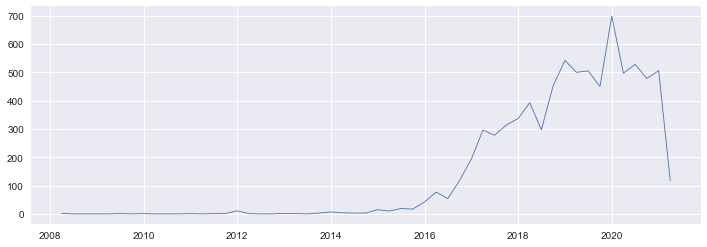

In [136]:
plt.figure(figsize=(12,4))
data = nflx['title'].resample('Q').count()

plt.plot(data, linewidth=0.85)

plt.show()

In [29]:
nflx['title'].resample('Y').count()

date_added
2008-12-31       2
2009-12-31       2
2010-12-31       1
2011-12-31      13
2012-12-31       3
2013-12-31      11
2014-12-31      25
2015-12-31      88
2016-12-31     443
2017-12-31    1225
2018-12-31    1685
2019-12-31    2153
2020-12-31    2009
2021-12-31     117
Freq: A-DEC, Name: title, dtype: int64

넷플릭스는 초창기부터 서서히 콘텐츠를 늘려왔고, 2016년~2016년을 기점으로 폭발적으로 성장했습니다.<br>
현재 데이터는 시간 별 분포 차이가 심하기 때문에 시간 축을 그대로 사용하는 것은 바람직하지 않습니다.<br>
전체 기간을 몇 개의 구간으로 분할하여 위와 같이 구간(Y) 별로 너무 많은 데이터가 몰리거나, 너무 적은 데이터만 취합되지 않도록 합니다.

In [30]:
# 0부터 7까지, 각각 1111개씩 채워진 리스트 생성
seps = []
for i in range(1,7+1):
    sep = np.ones(1111,dtype=np.int8)*i
    seps.extend(sep)
print(len(seps))

7777


In [31]:
# seps는 숫자로서의 의미가 없다. string으로 변환한다.
nflx['seps'] = seps
nflx['seps'] = nflx['seps'].astype('str')
nflx.dtypes

type                    object
title                   object
country                 object
release_year    datetime64[ns]
rating                  object
duration                 int64
listed_in               object
description             object
seps                    object
dtype: object

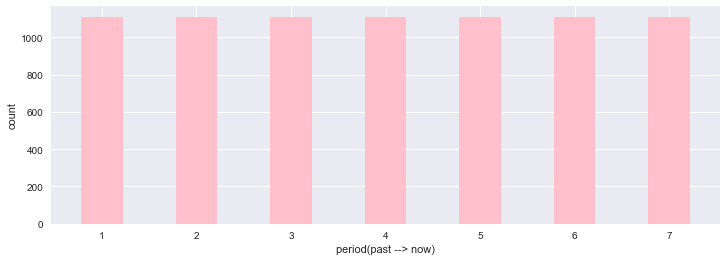

In [134]:
count_seps = nflx.groupby('seps').count()['title']

plt.figure(figsize=(12,4))
plt.bar(x=count_seps.index ,height=count_seps.values, width=0.44, color='pink')

plt.ylabel('count')
plt.xlabel('period(past --> now)')
plt.show()

총 7777개의 데이터를 시간 순으로 1111개씩 분할하였습니다. seps가 1에 가까울수록 최근으로부터 멀어집니다.

<br>
<br>

---
## 3. 가설 검정

아래 6가지 가설에 대하여 순차적으로 검증하고, 넷플릭스의 수급 전략을 분석합니다.

1. H1 : 최근 특정 콘텐츠 유형(TV show or Movie)이 늘고 있다. (주요 컬럼 : type)
2. H1 : 최근 특정 국가의 콘텐츠 수급 비중이 늘고 있다. (주요 컬럼 : country)
3. H1 : 최근 옛날(오래된) 콘텐츠 수급 비중이 늘고 있다. (주요 컬럼 : release_year)
4. H1 : 최근 어린이 콘텐츠 비중이 줄고 있다. (주요 컬럼 : rating)
5. H1 : 최근 길이(시리즈, 시간)가 짧은 콘텐츠 비중이 늘고 있다. (주요 컬럼 : duration)
6. H1 : 최근 유통하는 콘텐츠 장르가 더 다양해지고 있다. (주요 컬럼 : listed_in, description)

<br>

### 3-1. 특정 콘텐츠 유형에 대한 집중 수급 여부 분석

최근 TV 시리즈물의 퀄리티나 제작 속도는 영화 산업의 발전 속도를 따라잡고 있습니다.
따라서 넷플릭스가 TV 시리즈물과 영화 중 어떤 콘텐츠에 더 집중하고 있는지 확인하고자 합니다.

- H0 : 콘텐츠 유형(TV show or Movie)별 점유율은 전과 동일하다. 
- H1 : 최근 특정 콘텐츠 유형(TV show or Movie)이 늘고 있다.

In [33]:
nflx.groupby(['seps','type'])['title'].count().reset_index()

,seps,type,title
0,1,Movie,744
1,1,TV Show,367
2,2,Movie,802
3,2,TV Show,309
4,3,Movie,829
5,3,TV Show,282
6,4,Movie,779
7,4,TV Show,332
8,5,Movie,741
9,5,TV Show,370


In [34]:
count_type = pd.DataFrame(nflx.groupby(['seps','type']).count()['title'])
count_type.columns = ['count']
count_type

count
seps type          
1    Movie      744
     TV Show    367
2    Movie      802
     TV Show    309
3    Movie      829
     TV Show    282
4    Movie      779
     TV Show    332
5    Movie      741
     TV Show    370
6    Movie      764
     TV Show    347
7    Movie      718
     TV Show    393

In [35]:
count_type = pd.pivot_table(count_type, index='seps', columns='type')
count_type.columns=['movie', 'tv']
count_type

,movie,tv
seps,,
1,744,367
2,802,309
3,829,282
4,779,332
5,741,370
6,764,347
7,718,393


In [36]:
list(np.arange(1,8))

[1, 2, 3, 4, 5, 6, 7]

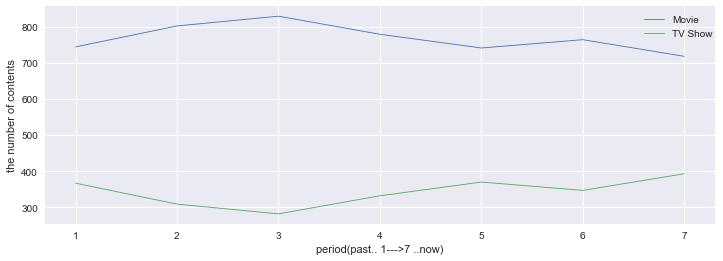

In [112]:
plt.figure(figsize=(12,4))

sns.lineplot(data=count_type, x=count_type.index, y=count_type['movie'], label='Movie', linewidth=0.85)
sns.lineplot(data=count_type, x=count_type.index, y=count_type['tv'], label='TV Show', linewidth=0.85)

plt.legend(bbox_to_anchor=(1.01,1))
plt.ylabel('the number of contents')
plt.xlabel('period(past.. 1--->7 ..now)')

plt.show()

**결론 :** <br>
**최근 영화보다 TV 시리즈가 늘고 있다. 귀무가설을 기각합니다.**<br>
특히 넷플릭스 서비스 초기보다 현 시점에서 TV 시리즈가 늘고 있는 것에 의미가 있습니다.
초기 영화 수급이 어려웠던 때보다 최근 자본이 받쳐주는 상황에서도 TV 시리즈 보유량을 늘리는 것을 보면 TV 시리즈에 대한 강한 시장 수요를 간접적으로 이해할 수 있습니다.

<br>

### 3-2. 특정 국가를 겨냥한 콘텐츠 현황 분석

콘텐츠 플랫폼의 경우 특정 국가 진입 및 초기 점유율 확보를 위해 해당 국가에서 생산한 콘텐츠를 전략적으로 확보하는 경향이 있습니다.
국가별 콘텐츠 비중을 살펴보고 최근 순위나 점유율의 변동이 있는지 살펴보도록 합니다.

- H0 : 국가별 콘텐츠 수급 비중은 전과 동일하다.
- H1 : 최근 특정 국가의 콘텐츠 수급 비중이 늘고 있다. 

In [38]:
# 가장 최근 확보한 1111개 콘텐츠의 제작 국가별 비중
nflx.loc[nflx['seps']=='7','country'].value_counts()[:10]

United States     385
India             112
United Kingdom     38
Japan              31
Canada             29
Philippines        25
South Korea        24
Spain              16
France             15
Indonesia          15
Name: country, dtype: int64

In [39]:
top10_countries = nflx.loc[nflx['seps']=='7','country'].value_counts()[:10].index
top10_countries

Index(['United States', 'India', 'United Kingdom', 'Japan', 'Canada',
       'Philippines', 'South Korea', 'Spain', 'France', 'Indonesia'],
      dtype='object')

In [40]:
seps_by_top10 = nflx.loc[nflx['country'].isin(top10_countries),['country','seps']]
seps_by_top10

,country,seps
date_added,,
2008-01-01,United States,1
2008-02-04,United States,1
2009-11-18,United States,1
2010-11-01,United States,1
2011-09-27,United States,1
...,...,...
2021-01-15,United States,7
2021-01-15,United States,7
2021-01-15,United States,7


In [41]:
seps_by_top10.loc[seps_by_top10['country'] == top10_countries[0]].groupby('seps').count()

,country
seps,
1,415
2,332
3,285
4,336
5,434
6,362
7,385


In [42]:
top10_countries

Index(['United States', 'India', 'United Kingdom', 'Japan', 'Canada',
       'Philippines', 'South Korea', 'Spain', 'France', 'Indonesia'],
      dtype='object')

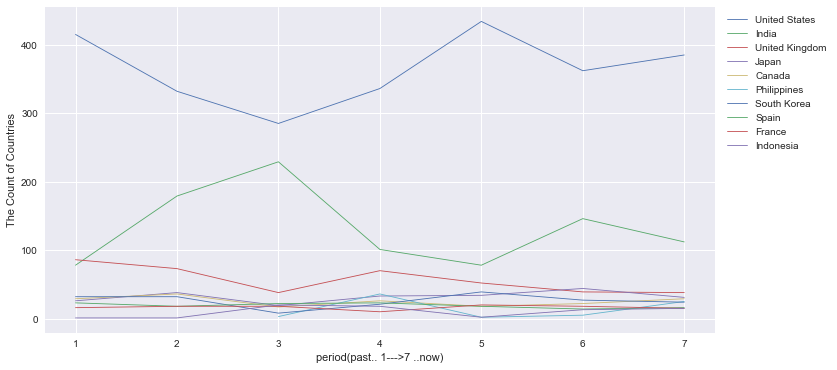

In [111]:
plt.figure(figsize=(12,6))
for country in list(top10_countries):
    count_country = seps_by_top10.loc[seps_by_top10['country'] == country].groupby('seps').count()
    sns.lineplot(data=count_country, x=count_country.index, y=count_country['country'], label=country, linewidth=0.85)
    
plt.legend(bbox_to_anchor=(1.005,1))

plt.ylabel('The Count of Countries')
plt.xlabel('period(past.. 1--->7 ..now)')

plt.show()

**결론 :**<br>
**국가별 콘텐츠 수급 비중은 전과 다릅니다. 귀무가설을 기각합니다.**
한 때, 인도 영화 수급 비중이 미국 본토 콘텐츠 수급 비중과 유사했던 적도 있으나 현재 미국 콘텐츠에 더 집중하고 있는 것으로 보입니다.
동시에 영국 콘텐츠 수급 비중을 점차 줄여나가고 있습니다.


<br>

### 3-3. 콘텐츠 수급 대상 연도 분석

최근 국내에서는 과거 히트작이 재상영되거나 유튜브 등을 통해 다시 회자되는 시청 트랜드가 생겨나고 있습니다.
전 세계적으로 이러한 현상이 나타나고 있다면 넷플릭스에서도 최신 영화, 최신 드라마만 집중하지 않고 더 넓은 범위의 연도를 고려할 수 있겠습니다.

- H0 : 최근 옛날(오래된) 콘텐츠 수급 비중이 늘고 있다.
- H1 : 최근 옛날(오래된) 콘텐츠 수급 비중이 늘고 있다.

In [44]:
nflx

,type,title,country,release_year,rating,duration,listed_in,description,seps
date_added,,,,,,,,,
2008-01-01,Movie,To and From New York,United States,2006-01-01,TV-MA,81,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",1
2008-02-04,TV Show,Dinner for Five,United States,2007-01-01,TV-MA,1,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",1
2009-05-05,Movie,Just Another Love Story,Denmark,2007-01-01,TV-MA,104,"Dramas, International Movies",When he causes a car accident that leaves a yo...,1
2009-11-18,Movie,Splatter,United States,2009-01-01,TV-MA,29,Horror Movies,"After committing suicide, a washed-up rocker r...",1
2010-11-01,Movie,Mad Ron's Prevues from Hell,United States,1987-01-01,NR,84,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",1
...,...,...,...,...,...,...,...,...,...
2021-01-15,Movie,Wish You,NaN,2021-01-01,TV-PG,102,"Dramas, International Movies, LGBTQ Movies","Singing and dreaming together, a talented sing...",7
2021-01-15,TV Show,The Magicians,"United States, Canada",2020-01-01,TV-MA,5,"TV Dramas, TV Sci-Fi & Fantasy",When grad student Quentin Coldwater enters a c...,7
2021-01-16,Movie,Death of Me,"United States, Thailand",2020-01-01,R,94,Horror Movies,"With no memory of the previous night, a vacati...",7


'출시일로부터 얼마나 지난 콘텐츠를 수급했는가?' 에 대한 데이터를 확보합니다.

In [45]:
add_from_release = pd.DataFrame(nflx.index - nflx['release_year'])
add_from_release.columns = ['days']
add_from_release

,days
date_added,
2008-01-01,730 days
2008-02-04,399 days
2009-05-05,855 days
2009-11-18,321 days
2010-11-01,8705 days
...,...
2021-01-15,14 days
2021-01-15,380 days
2021-01-16,381 days


In [46]:
# 숫자만 남긴다.
add_from_release['days'] = add_from_release['days'].apply(lambda x : str(x).split(' ')[0])
add_from_release['days'] = add_from_release['days'].astype('int64')
add_from_release

,days
date_added,
2008-01-01,730
2008-02-04,399
2009-05-05,855
2009-11-18,321
2010-11-01,8705
...,...
2021-01-15,14
2021-01-15,380
2021-01-16,381


In [88]:
add_from_release

,days,seps
date_added,,
2008-01-01,730,1
2008-02-04,399,1
2009-05-05,855,1
2009-11-18,321,1
2010-11-01,8705,1
...,...,...
2021-01-15,14,7
2021-01-15,380,7
2021-01-16,381,7


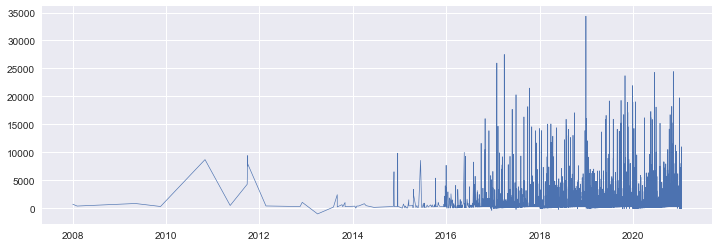

In [107]:
# 시계열 그래프 확인
plt.figure(figsize=(12,4))
plt.plot(add_from_release['days'], linewidth=0.64)
plt.show()

역시나 데이터가 '최근'에 밀집되어 있어서 시계열 그대로 데이터 분포를 분석하기는 어렵습니다.
이번에도 `seps` 컬럼을 붙여서 사용하도록 합니다.

In [48]:
add_from_release['seps'] = nflx['seps']
add_from_release

,days,seps
date_added,,
2008-01-01,730,1
2008-02-04,399,1
2009-05-05,855,1
2009-11-18,321,1
2010-11-01,8705,1
...,...,...
2021-01-15,14,7
2021-01-15,380,7
2021-01-16,381,7


In [95]:
data

,days
seps,
1,1620.840684
2,1533.819082
3,1693.895590
4,1470.170117
5,2354.061206
6,2468.386139
7,1818.285329


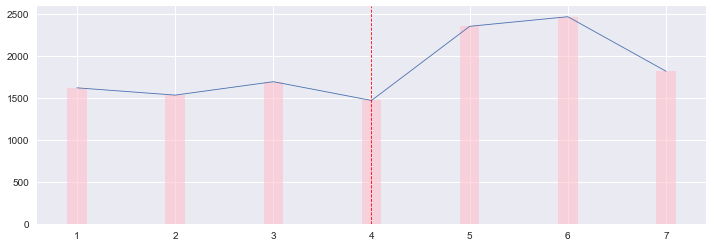

In [102]:
# 각 시계열 구간 별 평균 집계
plt.figure(figsize=(12,4))

data = add_from_release.groupby('seps').mean()
plt.plot(data, linewidth=0.85)
plt.bar(height=data['days'], x=data.index, width=0.2, alpha=0.6, color='pink')
plt.axvline(x=3, color='r', linestyle='--', linewidth=0.85)

plt.show()

**결론 :**<br>
넷플릭스는 과거(1,2,3,4)에 비해 최근(5,6,7) 출시일이 오래 지난 콘텐츠를 많이 수급한 경향이 있습니다. 따라서 귀무가설을 기각합니다.  
넷플릭스 수급 현황을 보면서 국내와 마찬가지로 세계적으로 시간이 흐른 명작들을 다시 보고자 하는 소비자 수요도 확인해볼 수 있었습니다.

<br>

### 3-4. 넷플릭스의 주요 소비자 타겟(연령대) 분석

넷플릭스 사용자가 늘어나면서, 이탈율 관리를 위해 주 타겟층을 확실하게 확보하고자 하는 움직임을 보일 수 있습니다.  
콘텐츠 플랫폼은 2~30대 사용자 수가 가장 많습니다.  
따라서 어린이 연령대의 비중이 낮아지는지, 반대로 성인 연령대 콘텐츠 비중이 높아지는지 함께 확인하는 것을 통해 넷플릭스가 집중하고 있는 타겟층을 분석할 수 있겠습니다.

- H0 : 어린이 콘텐츠 비중은 일정하게 유지되고 있다.
- H1 : 최근 어린이 콘텐츠 비중이 줄고 있다.

[(참고) 영화, TV 관람 등급 표](https://www.primevideo.com/help/ref=atv_hp_nd_cnt?language=ko_KR&nodeId=GFGQU3WYEG6FSJFJ)

In [50]:
nflx['rating'].unique()

array(['TV-MA', 'NR', 'TV-PG', 'TV-14', 'PG', 'R', 'TV-G', 'G', 'TV-Y',
       'TV-Y7-FV', 'TV-Y7', 'PG-13', nan, 'NC-17', 'UR'], dtype=object)

In [51]:
rating_dict = {
    'kids' : ['G','TV-G','TV-Y'], # 전체관람가
    'elem' : ['PG','TV-Y7','TV-Y7-FV','TV-PG'], # 7세 이상
    'teen' : ['PG-13'], # 13세 이상
    'youth' : ['TV-14'], # 16세 이상
    'adult' : ['NC-17','R','TV-MA','NR','UR'] # 18세 이상, 청불 포함
}

In [52]:
ratings = rating_dict.keys()
rating_df = pd.DataFrame(columns=ratings)
rating_list = []

for i in range(1,8): # seps : 1~7
    rating_list = []
    for key in rating_dict.keys(): # rating : kids / elem / teen / youth / adult
        rating_list.append(nflx.loc[nflx['seps']==str(i),'rating'].str.contains('|'.join(rating_dict[key])).sum())
    rating_df = rating_df.append(pd.Series(rating_list,index=rating_df.columns), ignore_index=True)
rating_df = rating_df.astype('int64')
rating_df

,kids,elem,teen,youth,adult
0,316,253,16,271,518
1,307,248,30,298,505
2,285,215,36,316,510
3,255,219,51,278,578
4,358,282,93,237,516
5,316,233,79,282,513
6,388,263,81,246,477


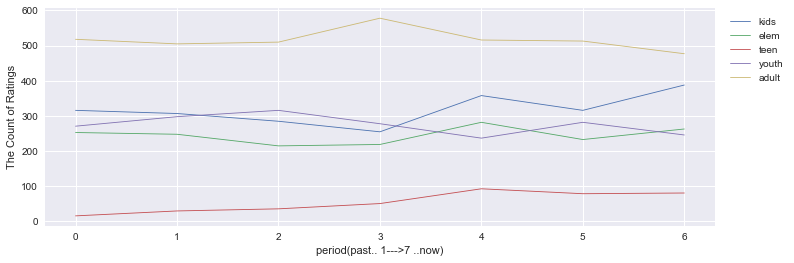

In [80]:
plt.figure(figsize=(12,4))
for col in list(rating_df.columns):
    sns.lineplot(data=rating_df, x=rating_df.index, y=rating_df[col], label=col, linewidth=0.85)

plt.legend(bbox_to_anchor=(1.01,1))

plt.ylabel('The Count of Ratings')
plt.xlabel('period(past.. 1--->7 ..now)')

plt.show()    


**결론 :**<br>
**adult 등급의 콘텐츠 수급은 줄어드는 반면 kids와 teen 등급 수급은 늘고 있습니다. 연구가설을 기각하고 귀무가설을 채택합니다.  
- 가장 활발한 콘텐츠 이용자가 2~30대라는 점에서 전략적으로 해당 연령층에 집중할 것이라는 예상을 했으나 예상과 다른 결과를 확인했습니다.  
- 넷플릭스는 2-30대 뿐만아니라 더 젋은 세대까지 확보하고자 합니다.  
- 이는 IT 기술과 영상 콘텐츠가 익숙한 Z세대를 고려했을때 충분히 납득가능한 결과입니다.
- (국내에서도 초등학생들이 네이버보다 유튜브로 먼저 검색한다네요.)

<br>

### 3-5. 콘텐츠 평균 재생 시간 분석

세계적으로 틱톡과 같은 숏폼 콘텐츠가 유행입니다.  
또한, 왕좌의게임과 같은 드넓은 세계관의 장기 시리즈가 과거 인기였다면 최근에는 킹덤, 스위트홈처럼 짧고 자극적인 시리즈가 주목을 받고 있습니다.  
이에 따라 최근 넷플릭스에서 콘텐츠를 수급할 때 재생 시간을 고려하는 경향이 있는지 여부를 확인하고자 합니다.

- H0 : 평균 콘텐츠 재생 시간은 전과 동일하거나 더 길어지고 있다.
- H1 : 최근 재생 시간이 짧은 콘텐츠 비중이 늘고 있다.

In [54]:
duration_df = pd.DataFrame(nflx.groupby(['seps','type'])['duration'].mean())
duration_df

duration
seps type               
1    Movie     88.951613
     TV Show    1.662125
2    Movie     99.214464
     TV Show    1.915858
3    Movie    102.677925
     TV Show    1.627660
4    Movie     98.812580
     TV Show    1.617470
5    Movie     98.291498
     TV Show    1.624324
6    Movie    106.675393
     TV Show    1.878963
7    Movie    100.000000
     TV Show    1.972010

In [55]:
duration_df = pd.pivot_table(duration_df, index='seps', columns='type')
duration_df.columns = ['movie','tv']
duration_df

,movie,tv
seps,,
1,88.951613,1.662125
2,99.214464,1.915858
3,102.677925,1.627660
4,98.812580,1.617470
5,98.291498,1.624324
6,106.675393,1.878963
7,100.000000,1.972010


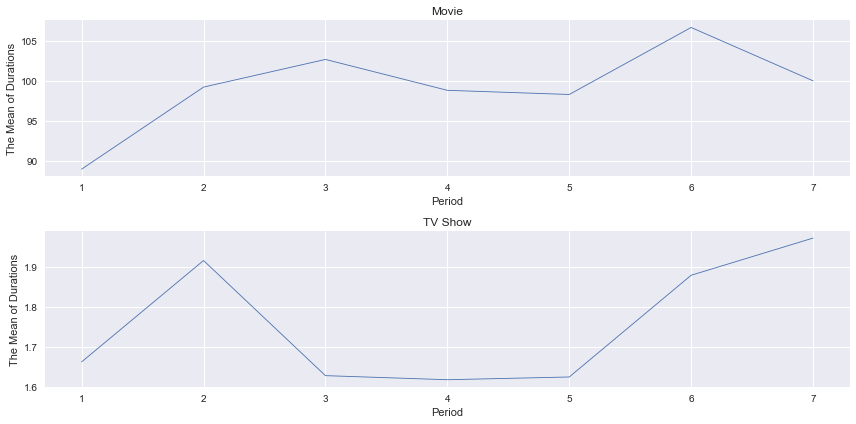

In [71]:
fig,axes = plt.subplots(2,1, figsize=(12,6))

sns.lineplot(data=duration_df, x=duration_df.index, y=duration_df['movie'], ax=axes[0], linewidth=0.85)
sns.lineplot(data=duration_df, x=duration_df.index, y=duration_df['tv'], ax=axes[1], linewidth=0.85)

axes[0].set_title('Movie')
axes[1].set_title('TV Show')

axes[0].set_ylabel('The Mean of Durations')
axes[1].set_ylabel('The Mean of Durations')

axes[0].set_xlabel('Period')
axes[1].set_xlabel('Period')

plt.tight_layout()
plt.show()

In [57]:
# 급격히 늘고 있는 TV Show 방영 차수 빈도 확인
nflx.loc[nflx['type']=='TV Show','duration'].value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
12       2
11       2
15       2
13       1
16       1
Name: duration, dtype: int64

**결론 :**<br>
오히려 최근 평균 콘텐츠 재생 시간이 증가하고 있다. 연구가설을 기각하고 귀무가설을 채택합니다.  
특히 TV Show의 경우 시리즈물에 대한 수요가 더 커지는 것을 확인할 수 있습니다. 다만, 수치상 큰 차이가 없기 때문에 넷플릭스에서 전략적으로 의도했다기보다는 최근 제작되는 콘텐츠들이 더 풍성하고 퀄리티있게 제작되면서 자연스럽게 시리즈물이 많아지고, 영화 시간이 길어진 것으로 보입니다.

<br>

### 3-6. 넷플릭스에서 주로 수급하는 콘텐츠 장르 분석

콘텐츠, OTT시장의 고도화된 개인화 추천서비스로 대중적인 취향보다 개별적 취향을 더 심도깊게 고민하고 기술적으로 분석하고 있습니다.
넷플릭스는 추천서비스를 비즈니스에 적극적으로 활용하면서 가파른 성장을 이뤄낸 경험이 있다.
따라서 넷플릭스는 고객을 더 세분화하고 이에 따라 콘텐츠 장르를 더 다양하게 분류하고 수급하는 전략을 취할 수 있습니다. 이에 따라 다음과 같은 가설을 설정합니다.

- H0 : 최근 유통하는 콘텐츠 장르는 그 수가 과거와 같거나 적다.
- H1 : 최근 유통하는 콘텐츠 장르가 더 다양해지고 있다.

In [58]:
# 전체 기간 중 장르별 콘텐츠 수
nflx['listed_in'].value_counts()

Documentaries                                                   334
Stand-Up Comedy                                                 321
Dramas, International Movies                                    320
Comedies, Dramas, International Movies                          243
Dramas, Independent Movies, International Movies                215
                                                               ... 
Action & Adventure, Sports Movies                                 1
Anime Series, Crime TV Shows, TV Thrillers                        1
Comedies, Dramas, Sports Movies                                   1
International TV Shows, Spanish-Language TV Shows, TV Horror      1
TV Action & Adventure, TV Comedies, TV Sci-Fi & Fantasy           1
Name: listed_in, Length: 491, dtype: int64

넷플릭스에는 다큐멘터리가 가장 많고, 스탠드업코디미가 그 다음 순이네요.

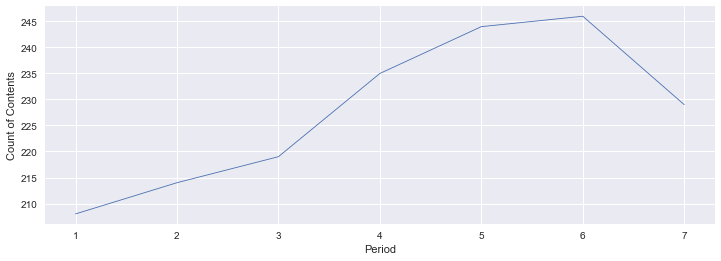

In [69]:
plt.figure(figsize=(12,4))
nflx.groupby('seps')['listed_in'].nunique().plot(linewidth=0.85)

plt.xlabel('Period')
plt.ylabel('Count of Contents')
plt.show()

**최근으로 올수록 더 다양한 장르를 보유하는 추세를 보입니다. 콘텐츠 장르가 더 다양하지고 있으므로(1,2,3,4 Period < 5,6,7 Period) 귀무가설을 기각합니다.**  
해당 데이터에서는 추가로 더 많은 정보를 얻어낼 수 있을 것 같습니다. 과거에는 어떤 장르를 주로 수급했고, 최근 어떤 장르를 주로 수급하는지 알아보도록 합니다.

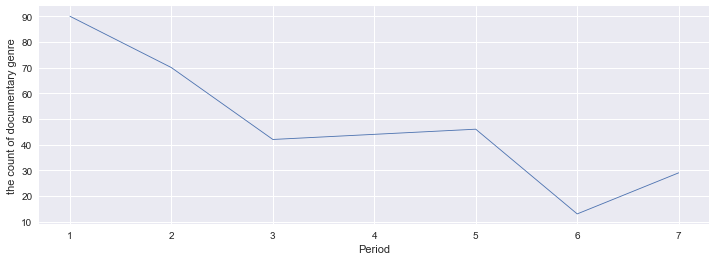

In [67]:
docum_count = nflx.loc[nflx['listed_in']=='Documentaries'].groupby('seps').count()['listed_in']

plt.figure(figsize=(12,4))
docum_count.plot(linewidth=0.85)
plt.ylabel('the count of documentary genre')
plt.xlabel('Period')

plt.show()

전체 콘텐츠 수에서 다큐멘터리 장르가 차지하는 비중이 가장 높았는데, 이는 넷플릭스 초기에 많이 수급했던 것에 원인이 있었습니다. 
최근 넷플릭스는 다큐멘터리 수급에 집중하지 않고 있습니다.

In [61]:
# 최근 집중적으로 수급하는 장르 확인
nflx.loc[nflx['seps']=='7','listed_in'].value_counts()

Dramas, International Movies                            45
Kids' TV                                                41
Children & Family Movies, Comedies                      38
Children & Family Movies                                35
Comedies, Dramas, International Movies                  34
                                                        ..
Cult Movies, Dramas, International Movies                1
Crime TV Shows, International TV Shows, TV Mysteries     1
Crime TV Shows, International TV Shows, TV Comedies      1
Classic Movies, Thrillers                                1
TV Dramas, TV Sci-Fi & Fantasy                           1
Name: listed_in, Length: 229, dtype: int64

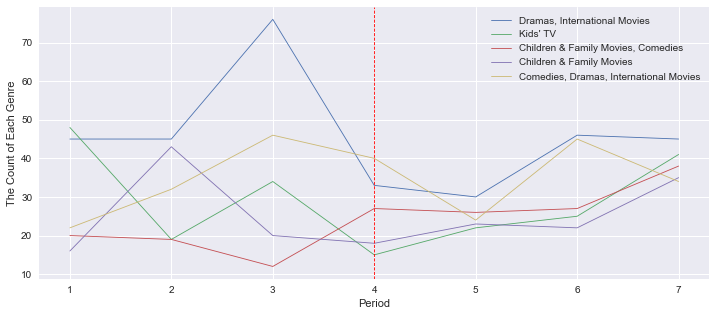

In [65]:
top5_genre = nflx.loc[nflx['seps']=='7','listed_in'].value_counts().index[:5]

plt.figure(figsize=(12,5))
for genre in list(top5_genre):
    genre_count = nflx.loc[nflx['listed_in']==genre].groupby('seps').count()['listed_in']
    sns.lineplot(x=genre_count.index, y=genre_count.values, label=genre, linewidth=0.85)
    
plt.xlabel('Period')
plt.ylabel('The Count of Each Genre')
plt.axvline(x=3, linestyle='--', color='r', linewidth=0.85)
plt.show()


키즈 콘텐츠, 가족 콘텐츠의 비중이 4 `Period` 부터 꾸준히 상승하고 있네요.

**결론 :**<br>
과거 대비 다양한 장르를 확보하면서 다큐멘터리와 같은 콘텐츠 점유율이 높았던 장르의 비중이 낮아지고,
더 다양한 고객층의 니즈를 반영하고자 하는 것을 확인할 수 있습니다.

<br>
<br>

---
## 4. 종합 결론

아래 6가지 가설 검정 과정을 통해 **넷플릭스가 시장 점유를 위해 취하고 있는 콘텐츠 수급 전략**을 분석해보았습니다.

1. H1 : 최근 특정 콘텐츠 유형(TV show or Movie)이 늘고 있다. (주요 컬럼 : type)
2. H1 : 최근 특정 국가의 콘텐츠 수급 비중이 늘고 있다. (주요 컬럼 : country)
3. H1 : 최근 옛날(오래된) 콘텐츠 수급 비중이 늘고 있다. (주요 컬럼 : release_year)
4. H1 : 최근 어린이 콘텐츠 비중이 줄고 있다. (주요 컬럼 : rating)
5. H1 : 최근 길이(시리즈, 시간)가 짧은 콘텐츠 비중이 늘고 있다. (주요 컬럼 : duration)
6. H1 : 최근 유통하는 콘텐츠 장르가 더 다양해지고 있다. (주요 컬럼 : listed_in, description)

종합하면,

- 넷플릭스는 영화보다 **TV 시리즈 수급**을 늘리고 있고, **자국(미국) 콘텐츠 확보**에 힘을 싣고 있습니다.
- 또한 소비자 수요를 반영해 최신 콘텐츠뿐만 아니라 **시간이 흐른 콘텐츠**들을 함께 확보하고 있고,
- 2~30대 주요 고객층 이외 **어린이를 포함해 더 다양한 고객을 타겟**으로 하고 있었습니다.
- 숏폼 콘텐츠가 유행하고 있지만 영화 산업이나 TV 드라마 산업에서 자체 콘텐츠의 길이를 줄이려는 시도를 하는 경향은 없으며,
- 넷플릭스 역시 영상물의 **재생 시간에 대해서는 수급 기준으로 고려하지 않는** 것으로 보입니다.
- 마지막으로 다양한 고객들의 수요를 맞추기 위해 **다양한 콘텐츠 장르**를 선보이면서,
- 특히 **어린이 및 가족 콘텐츠** 보유량을 늘려 다양한 고객층의 니즈를 반영하는 모습을 보입니다.